# Netflix Sentiment Analysis

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize


os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Functions

In [2]:
def check_for_nulls_dupes(df):
  print(f"The amount of NaN values: {df.isna().sum()}")
  print(f"The amount of Duplicated values: {df.duplicated().sum()}")

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 7))
  plt.pie(counts, labels=unique, autopct="%1.1f%%", startangle=140)
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10, 7))
  sns.countplot(x=target)
  plt.title("Target Class Breakdown")
  plt.xlabel("Target Class")
  plt.ylabel("Counts")
  plt.xticks(rotation=45)
  plt.show()

def remove_stop_words(content):
  word_tokens = " ".join(word_tokenize(content))
  
  filtered_word_tokens = re.sub(r'[^a-zA-Z\s]', "", word_tokens).split(" ")
  filtered_sentence = [w.lower().strip() for w in filtered_word_tokens if not w.lower() in ENGLISH_STOP_WORDS]
  return " ".join(filtered_sentence).strip()


In [3]:
df = pd.read_csv("/Users/maukanmir/Downloads/netflix_reviews.csv",nrows=25000)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,1772b40f-8cfd-4c56-a370-c944e5b5ce48,Gato Reviews,Utter trash. Been a customer for over 10 years...,1,0,8.114.0 build 19 50680,2024-05-23 22:35:45,8.114.0 build 19 50680
1,b6b64d5c-30f6-4bed-8d66-9b4582e72e3b,Quincy Alleyne,Good,5,0,8.115.2 build 6 50688,2024-05-23 22:34:47,8.115.2 build 6 50688
2,8be7d06b-f90e-4ca7-abf6-f908b40946e2,nez zuber,The only streaming service that beats Netflix ...,2,0,NaN,2024-05-23 22:33:52,NaN
3,72485684-9e73-4dca-a580-0a92b3a3a7e6,Elon Frett,Everything that's objectively good gets remove...,1,0,8.109.0 build 7 50647,2024-05-23 22:30:43,8.109.0 build 7 50647
4,348796c3-0056-4491-80f7-d6c38fcb2790,kwakhanya bambeni,Wish the owner be a trillioner because he/she ...,4,0,NaN,2024-05-23 22:30:27,NaN
...,...,...,...,...,...,...,...,...
24995,b6d3427b-1bd9-4767-86e4-6b69b4349908,avinaash Dey,Good but will be more if get a Hindi languages...,4,0,8.103.0 build 8 50614,2024-02-18 05:18:14,8.103.0 build 8 50614
24996,cb5480de-f2ab-44f0-97e5-c7e28f8b06ba,Dr. Gurmeet Singh Mankan,Nice and excellent performance for full entert...,5,1,8.103.0 build 8 50614,2024-02-15 02:39:01,8.103.0 build 8 50614
24997,4adfe2ba-b346-4afc-8db0-74d39e492a83,A Google user,Cool app but it is a bit frustrating for us fr...,2,0,7.53.3 build 31 34824,2020-04-27 21:12:37,7.53.3 build 31 34824
24998,3f852e4c-21df-4f3c-a122-e9d5f85a2e66,Biki Das,I am new to Netflix and u all know that withou...,3,0,NaN,2020-12-04 16:09:25,NaN


# Check for Nulls and Dupe Values

In [4]:
check_for_nulls_dupes(df)

The amount of NaN values: reviewId                   0
userName                   1
content                    2
score                      0
thumbsUpCount              0
reviewCreatedVersion    2549
at                         0
appVersion              2549
dtype: int64
The amount of Duplicated values: 287


In [5]:
df.dropna(inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(22224, 8)

# Check For Class Imabalance

# Scores Breakdown

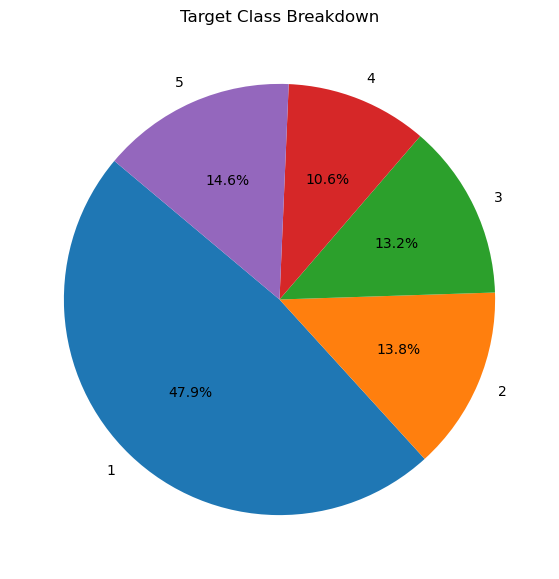

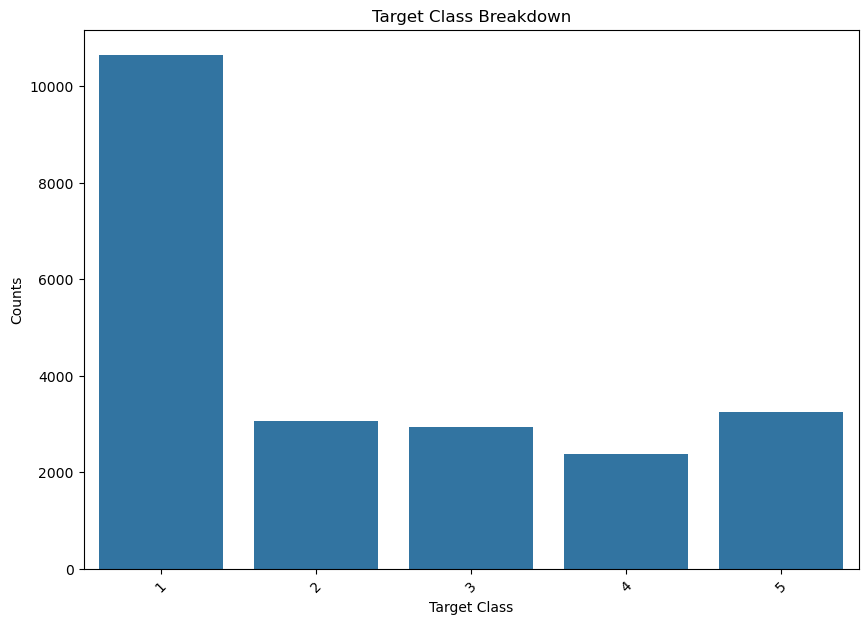

In [8]:
check_class_imbalance(df["score"])

# We have a skewed class imbalance, we may need to address this with over sampling methods to ensure our model is able to generalize to new data

In [9]:
df.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

# Drop the columns we do not need

In [10]:
df.drop(["reviewId", "userName", "reviewCreatedVersion", "appVersion"],axis=1, inplace=True)

In [11]:
df

,content,score,thumbsUpCount,at
0,Utter trash. Been a customer for over 10 years...,1,0,2024-05-23 22:35:45
1,Good,5,0,2024-05-23 22:34:47
3,Everything that's objectively good gets remove...,1,0,2024-05-23 22:30:43
5,Amazing app for watching,5,0,2024-05-23 22:16:49
8,I am unable to open the app 500.-172 501.-172 ...,1,0,2024-05-23 21:52:53
...,...,...,...,...
24994,App is fine mostly. I wish you could hide sugg...,3,0,2021-06-05 21:22:23
24995,Good but will be more if get a Hindi languages...,4,0,2024-02-18 05:18:14
24996,Nice and excellent performance for full entert...,5,1,2024-02-15 02:39:01
24997,Cool app but it is a bit frustrating for us fr...,2,0,2020-04-27 21:12:37


In [12]:
df.describe()

,score,thumbsUpCount
count,22224.000000,22224.000000
mean,2.302826,47.795896
std,1.501832,219.674216
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,4.000000,10.000000
max,5.000000,8032.000000


# Check for Skew in distribution

In [13]:
df["thumbsUpCount"].skew()

12.784343025055506

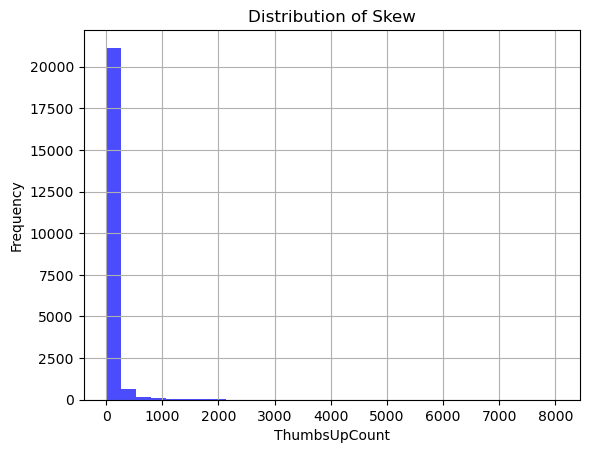

In [14]:
df["thumbsUpCount"].hist(bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Skew")
plt.xlabel("ThumbsUpCount")
plt.ylabel("Frequency")
plt.show()

In [15]:
df["score"].skew()

0.6971118392496796

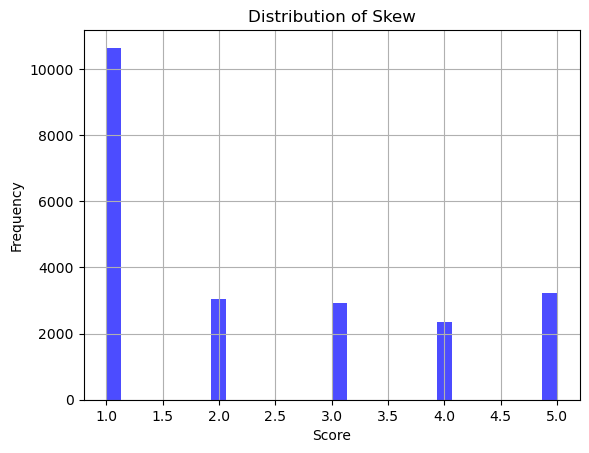

In [16]:
df["score"].hist(bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Skew")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Review count analysis

In [17]:
df["len_of_review_text"] = df["content"].apply(lambda x: len(x))
df["len_of_review_wordcount"] = df["content"].apply(lambda x: len(x.split()))

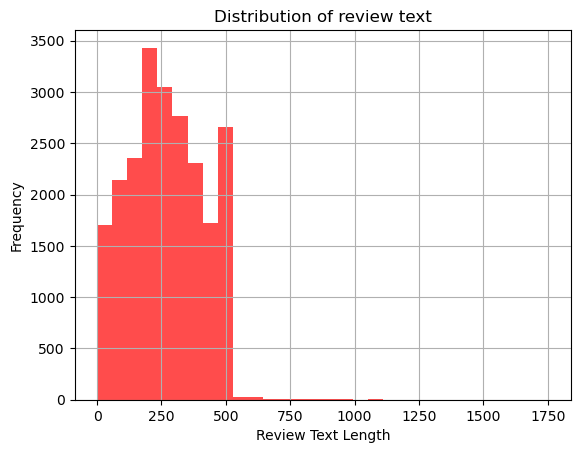

In [18]:
df["len_of_review_text"].hist(bins=30, color="red", alpha=0.7)
plt.title("Distribution of review text")
plt.xlabel("Review Text Length")
plt.ylabel("Frequency")
plt.show()

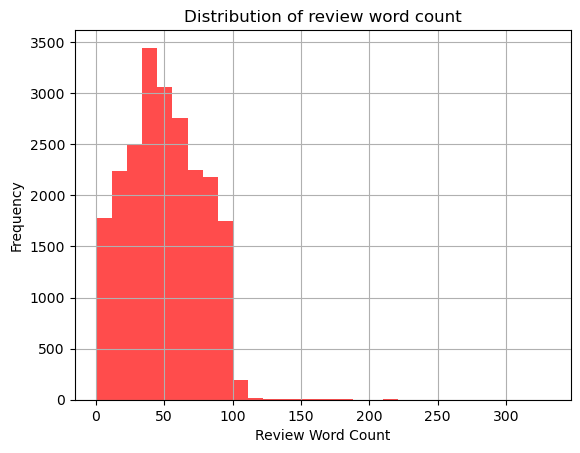

In [19]:
df["len_of_review_wordcount"].hist(bins=30, color="red", alpha=0.7)
plt.title("Distribution of review word count")
plt.xlabel("Review Word Count")
plt.ylabel("Frequency")
plt.show()

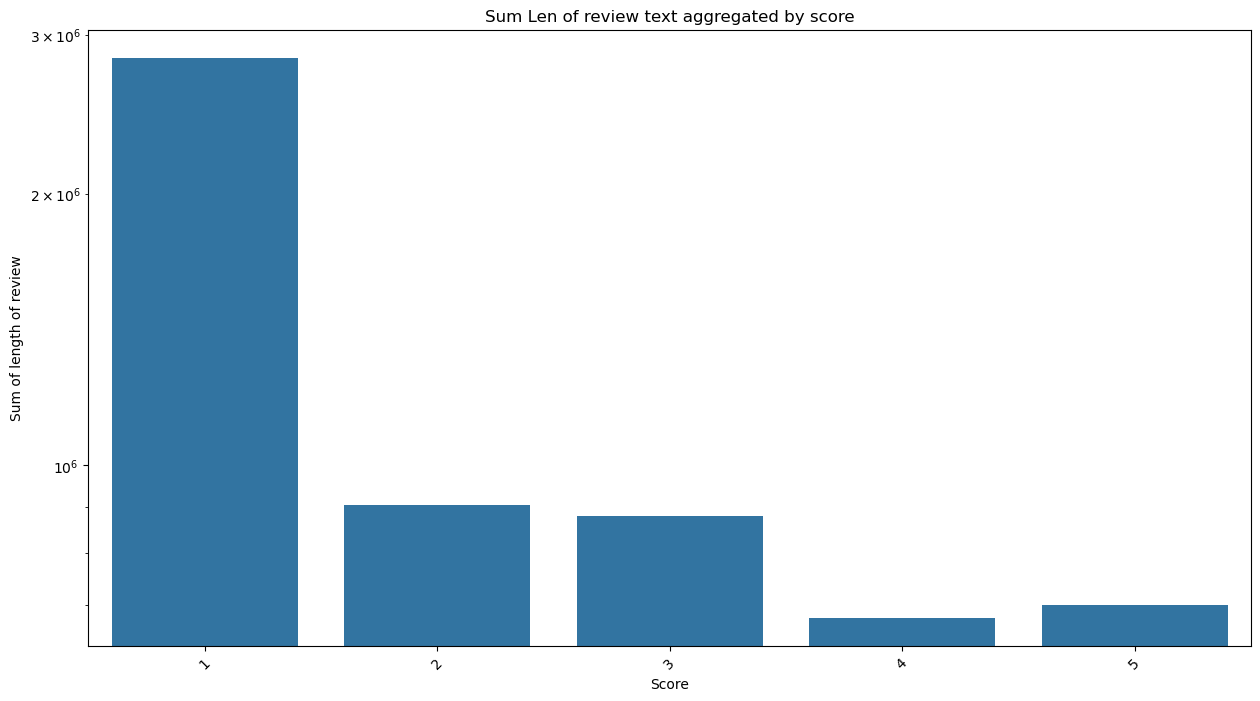

In [20]:
grouped_df = df.groupby("score")["len_of_review_text"].sum().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_df, x="score", y="len_of_review_text")
plt.title("Sum Len of review text aggregated by score")
plt.xlabel("Score")
plt.ylabel("Sum of length of review")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

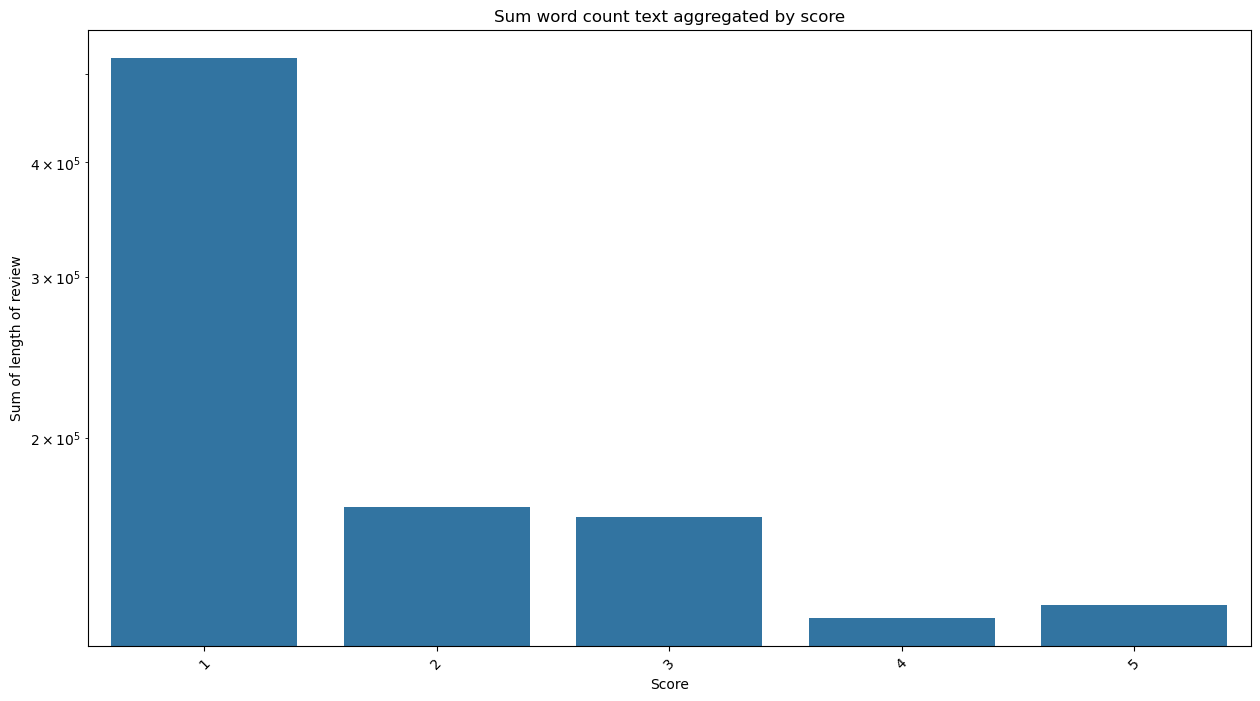

In [21]:
grouped_df = df.groupby("score")["len_of_review_wordcount"].sum().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_df, x="score", y="len_of_review_wordcount")
plt.title("Sum word count text aggregated by score")
plt.xlabel("Score")
plt.ylabel("Sum of length of review")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [22]:
df["content"] = df["content"].apply(lambda x: remove_stop_words(x))
df["score"] = df["score"].apply(lambda x: "postive" if x>=4 else "neg" if x<3 else "neu")
df["at"] = pd.to_datetime(df["at"])

df["day"] = df["at"].dt.day
df["month"] = df["at"].dt.month
df["year"] = df["at"].dt.year
df["hour"] = df["at"].dt.hour

df.drop("at", axis=1, inplace=True)

# Separate Feature Variables

In [25]:
X, y = df.drop("score", axis=1), df["score"]

# Bert Model

In [26]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]